# Label transform for forecasting with previous 2 days

In [17]:
import numpy as np
# import torch
# from scipy.stats import multivariate_normal
# from scipy.stats import dirichlet 
# from torch.distributions.multivariate_normal import MultivariateNormal
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# from keras import backend as K 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from skimage.metrics import mean_squared_error
from scipy import stats

In [23]:
gen = [[0	,0,	0,	0,	0	,0	,0,	0,	0.0049	,0.0478,	0.1707,	0.21	,0.1308,	0.0563,	0,	0,	0,	0	,0,	0,0	,0,	0	,0],
[0	,0,	0,	0,	0	,0	,0,	0,	0.0049	,0.0478,	0.1707,	0.21	,0.1308,	0.0563,	0,	0,	0,	0	,0,	0,0	,0,	0	,0]
]
real = [0	,0,	0	,0,	0	,0	,0,	0,	0.0225	,0.1016,	0.2879	,0.3642,	0.4274,	0.351	,0,	0	,0,	0	,0,	0	,0,	0,	0	,0
]

(ks_stat, ks_pval) = stats.ks_2samp(real, gen)
print(ks_stat, ' ', ks_pval)

0.2916666666666667   0.26283384201555077


In [32]:
import statsmodels.api as sm
gen_imgs_sq = [[1,2,3,1,1,1,1,1,1,1],[2,2,1,1,1,1,1,1,1,1]]
imgs_sq = [[3,3,1,1,1,1,1,1,1,1],[4,4,1,1,1,1,1,1,1,1]]
corrs = []
for gen_img in gen_imgs_sq:
    for real_img in imgs_sq:
        gen_corr = sm.tsa.acf(gen_img)
        real_corr = sm.tsa.acf(real_img)
        corrs.append(mean_squared_error(gen_corr, real_corr))
a = np.mean(corrs)
print(corrs)
print(a)

[0.4955831  0.49088958 0.5124725  0.50078386 0.49756834 0.5051342
 0.5038564  0.50115025 0.49012822 0.49945432 0.500207   0.5001988
 0.49184752 0.5070869  0.50023097 0.5037333  0.49559054 0.4935707
 0.49890006 0.5042782  0.5044072  0.49653745 0.50015336 0.50216925]
  [0.2746 0.2289 0.2393 0.2332 0.216  0.2009 0.1797 0.1741 0.1729 0.1556
 0.1385 0.1088 0.0999 0.0953 0.095  0.1188 0.1509 0.1591 0.1411 0.1283
 0.0999 0.0593 0.051  0.0432]

 [ 1.         -0.15258021 -0.27875273 -0.10201241  0.19853638 -0.08490877
 -0.26090668  0.01853496  0.16363992  0.13066204 -0.126149    0.06066327
 -0.1318005   0.11786233 -0.09272745 -0.12281306  0.06604538  0.17512085
  0.04694266 -0.16337638  0.02504567  0.0624289  -0.03420572 -0.01524946]
  [ 1.          0.79579346  0.61572881  0.40209748  0.23102814  0.12785589
  0.07321062  0.0804381   0.08207199  0.02913015 -0.04635754 -0.122613
 -0.16177378 -0.1885261  -0.18447925 -0.16740763 -0.16679619 -0.21937023
 -0.29760617 -0.33443697 -0.34730693 -0.32021161 -0.23205067 -0.14841858]

[0.011722932778108255, 0.011722932778108281, 0.0, 1.92833735681772e-32]
0.005861466389054134


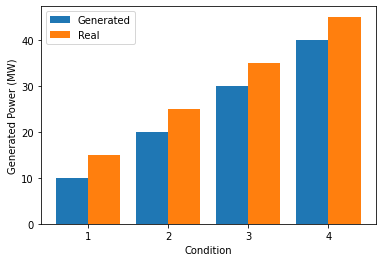

In [14]:
condition = [1,2,3,4]
gen = [10, 20, 30, 40]
real = [15, 25,35,45]

team = ['Team 1','Team 2','Team 3','Team 4','Team 5']
female = [5, 10, 15, 20, 25]
male = [15, 20, 30, 16, 13]

x_axis = np.arange(len(condition))

# Multi bar Chart

plt.bar(x_axis -0.2, gen, width=0.4, label = 'Generated')
plt.bar(x_axis +0.2, real, width=0.4, label = 'Real')

# Xticks

plt.xticks(x_axis, condition)
plt.xlabel('Condition')
plt.ylabel('Generated Power (MW)')
# Add legend

plt.legend()

# Display

plt.show()

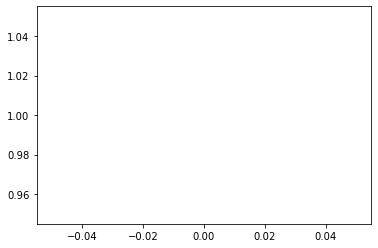

In [18]:
import statsmodels.api as sm
x = [0.1,0.6,0.4,0.5]
y = [10,60,40,50]
z = np.corrcoef(x)
z1 = np.corrcoef(y)

plt.plot(z)
plt.plot(z1)



In [27]:
def mean_metrics(gen_batch, real_batch):
    mse = []
    gen_batch = gen_batch.reshape(gen_batch.shape[0], 2)
    real_batch = real_batch.reshape(real_batch.shape[0], 2)

    for i in range(len(gen_batch)):
        gen_img = gen_batch[i]
        real_img = real_batch[i]
        # print('img ',gen_img.shape, gen_img)
        # print('img r ', real_img.shape, real_img)
        mse.append(mean_squared_error(real_img, gen_img))

        #ssim.append(ssim(real_img, gen_img, data_range=gen_img.max() - gen_img.min()))

    return [np.mean(mse)]

A = np.array([[1,1],[2,233],[3,13]])
B = np.array([[10,10],[20,212],[30,35]])

print(mean_metrics(A,B))
A = A.flatten()
B = B.flatten()
print(A)
print(mean_squared_error(A,B))

[356.6666666666667]
[  1   1   2 233   3  13]
356.6666666666667


In [27]:
sampled_labels = []
batch_size = 64
training_days = 2
for i in range(training_days):
    sampled_labels.append(np.random.randint(0, 4, batch_size))
sampled_labels = np.array(sampled_labels).reshape(batch_size, training_days)

print(sampled_labels)

[[0 3]
 [0 1]
 [2 2]
 [2 2]
 [0 1]
 [0 3]
 [3 2]
 [0 1]
 [2 1]
 [3 3]
 [3 0]
 [1 2]
 [3 0]
 [0 2]
 [2 1]
 [1 1]
 [3 0]
 [0 0]
 [0 3]
 [1 1]
 [1 2]
 [1 0]
 [1 2]
 [2 1]
 [0 3]
 [1 1]
 [1 0]
 [3 0]
 [2 1]
 [3 1]
 [2 1]
 [1 1]
 [0 0]
 [2 1]
 [0 2]
 [0 1]
 [0 0]
 [0 3]
 [0 3]
 [0 1]
 [3 2]
 [3 1]
 [3 0]
 [0 0]
 [0 3]
 [3 1]
 [1 2]
 [1 1]
 [2 0]
 [3 0]
 [3 2]
 [2 1]
 [2 1]
 [2 2]
 [0 3]
 [2 3]
 [1 2]
 [1 3]
 [1 2]
 [3 3]
 [1 2]
 [3 0]
 [1 2]
 [2 3]]


In [24]:
y_train = [1,2,3,4,5,6,7,8,9,10]
idx = 5
label_list = []
for i in reversed(range(2)):
    print(i)
    label_list.append(y_train[idx-i])

print(label_list)

multi_labels = np.array(y_train).reshape(5, 2)
print(multi_labels)

1
0
[5, 6]
[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]]


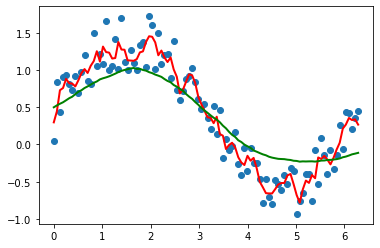

In [17]:
x = np.linspace(0,2*np.pi,100)
y = np.sin(x) + np.random.random(100) * 0.8

def smooth(y, box_pts):
    box = np.ones(box_pts)
    y_smooth = np.convolve(y, box, mode='same')/box_pts
    return y_smooth

plt.plot(x, y,'o')
plt.plot(x, smooth(y,3), 'r-', lw=2)
plt.plot(x, smooth(y,50), 'g-', lw=2)

In [17]:
a = [1,1,1,1,5,5,5,5,5,5,4,4,4,4]
print(int(len(a)/2))
print(np.mean(a[-5:-1]))

a = np.asarray([[2,1.123123],[2,1.123123],[2,1.123123]])
np.savetxt('Metrics.csv', a, delimiter=",",fmt='%1.5f')

7
4.25


In [14]:
def align_by_dist1(A, B):
    for i in range(len(A)):
        D = [] # This list will contain the index where the euclidean distance is lower than the threshold
        for j in range(len(B)):
            dist = np.linalg.norm(A[i] - B[j]) # Compute the euclidean distance between a target at index j and a prediction at index I
            if dist <= 4: # Select a treshold for the euclidean distance
                D.append(np.array([dist,j,i])) # Append the euclidean distance and the index of the target and prediction vector
        if D: # If we find an euclidean distance lower than the threshold we can now sort for the index i the list of prediction
            D_sorted = sorted(D,key=lambda elem:elem[0]) # We sort the array of distance lower than the threshold to get the minimum distance for the index I 
            value = D_sorted[0]
            B[value[2].astype(np.int64)], B[value[1].astype(np.int64)] = B[value[1].astype(np.int64)], B[value[2].astype(np.int64)] # We updated the target list position 
            A[value[2].astype(np.int64)] = [1000000,1000000] # We set the value of the predictions very high to not have duplicates when sorting the targets coordinates 
    return B

A = np.array([[14.0,44],[16,47],[27,79],[27,79],[27,79]])
B = np.array([[14.0,44],[16,0],[18,89],[27,79],[45,127]])

print(align_by_dist1(A,B))

[[14. 44.]
 [14. 44.]
 [27. 79.]
 [27. 79.]
 [27. 79.]]


Euclidean distance

In [3]:
def align_by_euclidean2(A,B):
    dist = 10000
    array1 = np.array([])
    array2 = np.array([])
    for arrayA in A:
        for arrayB in B:
            temp_d = np.linalg.norm(arrayA - arrayB)
            if temp_d < dist:
                dist = temp_d
                array1 = arrayA
                array2 = arrayB
    return [array1,array2]

A = np.array([[14.0,44],[16,47],[27,79]])
B = np.array([[14.0,46],[16,46],[18,89],[27,79],[45,127]])
print(align_by_euclidean2(A,B))

[array([27., 79.]), array([27., 79.])]


In [16]:
def align_by_dist_2(A, B):
    A = np.asarray(A, np.float64)
    B = np.asarray(B, np.float64)
    
    dist_sqr = (A[:, 0, None] - B[:, 0, None].T)**2 + (A[:, 1, None] - B[:, 1, None].T)**2
    min_dist_pt = np.argmin(dist_sqr, axis=1)
    
    reordered_B = B[min_dist_pt, :]
    
    num_pts = B.shape[0]
    remaining_indices = list(set(range(num_pts)) - set(min_dist_pt))
    remaining_B = B[remaining_indices, :]
    
    return np.vstack((reordered_B))

A = np.array([[14.0,44],[16,47],[27,79],[27,79],[27,79]])
B = np.array([[14.0,44],[16,0],[18,89],[27,78],[45,127]])

print(align_by_dist_2(A,B))

[[14. 44.]
 [14. 44.]
 [27. 78.]
 [27. 78.]
 [27. 78.]]


Autocorrelation

In [95]:

def acf(x, length=6):
    return np.array([1]+[np.corrcoef(x[:-i], x[i:])[0,1]  \
        for i in range(1, length-1)])

print(acf([1,2,3,4,5,6]))

[1. 1. 1. 1. 1.]


The Autocorrelation plot for the data is:


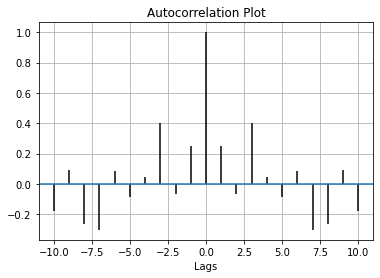

In [113]:
np.random.seed(42)
   
# Creating some random data.
data = np.random.randn(15)
   
# Adding plot title.
plt.title("Autocorrelation Plot")
 
# Providing x-axis name.
plt.xlabel("Lags")
 
# Plotting the Autocorrelation plot.
plt.acorr(data, maxlags = 10)
 
# Displaying the plot.
print("The Autocorrelation plot for the data is:")
plt.grid(True)
 
plt.show()

In [64]:
def fid(X, Y):
    m = X.mean(0)
    m_w = Y.mean(0)
    X_np = X.numpy()
    Y_np = Y.numpy()

    C = np.cov(X_np.transpose())
    C_w = np.cov(Y_np.transpose())
    C_C_w_sqrt = linalg.sqrtm(C.dot(C_w), True).real

    score = m.dot(m) + m_w.dot(m_w) - 2 * m_w.dot(m) + \
        np.trace(C + C_w - 2 * C_C_w_sqrt)
    return np.sqrt(score)

array1 = [[2],[1]]
array2 = [[2],[2]]
tensor1 = tf.convert_to_tensor(array1)
tensor2 = tf.convert_to_tensor(array2)
print(fid(tensor1,tensor1))

AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'mean'

In [59]:
import math
def bhattacharyya(a, b):
    """ Bhattacharyya distance between distributions (lists of floats). """
    if not len(a) == len(b):
        raise ValueError("a and b must be of the same size")
    return -math.log(sum((math.sqrt(u * w) for u, w in zip(a, b))))


x = bhattacharyya([0.1, 0.9], [0.1, 0.9])
print(x)

x = bhattacharyya([0.2, 0.8], [0.5, 0.5])
print(x)

x = bhattacharyya([0.1, 0.9], [0.5, 0.5])
print(x)

-0.0
0.05268025782891318
0.11157177565710491


MMD

In [2]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def MMD(x, y, kernel):
    """Emprical maximum mean discrepancy. The lower the result
       the more evidence that distributions are the same.

    Args:
        x: first sample, distribution P
        y: second sample, distribution Q
        kernel: kernel type such as "multiscale" or "rbf"
    """
    xx, yy, zz = torch.mm(x, x.t()), torch.mm(y, y.t()), torch.mm(x, y.t())
    rx = (xx.diag().unsqueeze(0).expand_as(xx))
    ry = (yy.diag().unsqueeze(0).expand_as(yy))
    
    dxx = rx.t() + rx - 2. * xx # Used for A in (1)
    dyy = ry.t() + ry - 2. * yy # Used for B in (1)
    dxy = rx.t() + ry - 2. * zz # Used for C in (1)
    
    XX, YY, XY = (torch.zeros(xx.shape).to(device),
                  torch.zeros(xx.shape).to(device),
                  torch.zeros(xx.shape).to(device))
    
    if kernel == "multiscale":
        
        bandwidth_range = [0.2, 0.5, 0.9, 1.3]
        for a in bandwidth_range:
            XX += a**2 * (a**2 + dxx)**-1
            YY += a**2 * (a**2 + dyy)**-1
            XY += a**2 * (a**2 + dxy)**-1
            
    if kernel == "rbf":
      
        bandwidth_range = [10, 15, 20, 50]
        for a in bandwidth_range:
            XX += torch.exp(-0.5*dxx/a)
            YY += torch.exp(-0.5*dyy/a)
            XY += torch.exp(-0.5*dxy/a)
      
      

    return torch.mean(XX + YY - 2. * XY)

array1 = [[2],[1]]
array2 = [[2],[2]]
tensor1 = tf.convert_to_tensor(array1)
tensor2 = tf.convert_to_tensor(array2)
print(MMD(tensor1,tensor2,0.1))

NameError: name '_C' is not defined

In [32]:
import tensorflow as tf



def gaussian_kernel(x1, x2, beta = 0.1):
    r = tf.transpose(x1)
    r = tf.expand_dims(r, 2)
    return tf.reduce_sum(K.exp( -beta * K.square(r - x2)), axis=-1)
  
def MMD(x1, x2):
    """
    maximum mean discrepancy (MMD) based on Gaussian kernel
    function for keras models (theano or tensorflow backend)
    
    - Gretton, Arthur, et al. "A kernel method for the two-sample-problem."
    Advances in neural information processing systems. 2007.
    """
    x1x1 = gaussian_kernel(x1, x1)
    x1x2 = gaussian_kernel(x1, x2)
    x2x2 = gaussian_kernel(x2, x2)
    diff = tf.reduce_mean(x1x1) - 2 * tf.reduce_mean(x1x2) + tf.reduce_mean(x2x2)
    return diff

print(MMD([[1],[1]],[[2],[2]]))

TypeError: Cannot convert -0.1 to EagerTensor of dtype int32

In [41]:
'MMD functions'
def compute_kernel(x, y):
    x_size = K.shape(x)[0]
    y_size = K.shape(y)[0]
    dim = K.shape(x)[1]
    tiled_x = K.tile(K.reshape(x, [x_size, 1, dim]), [1, y_size, 1])
    tiled_y = K.tile(K.reshape(y, [1, y_size, dim]), [x_size, 1, 1])
    return K.exp(-K.mean(K.square(tiled_x - tiled_y), axis=2) / K.cast(dim, 'float32'))

def compute_mmd(x, y):
    x_kernel = compute_kernel(x, x)
    y_kernel = compute_kernel(y, y)
    xy_kernel = compute_kernel(x, y)
    return K.mean(x_kernel) + K.mean(y_kernel) - 2 * K.mean(xy_kernel)

array1 = np.array([[2.1],[1.2]])
array2 = np.array([[2.1],[1.1]])
s = compute_mmd(array1,array2)

TypeError: x and y must have the same dtype, got tf.float64 != tf.float32

Autocorrelation

In [4]:
np.arange(5, 10)
np.arange(5)

array([0, 1, 2, 3, 4])

In [2]:

idx = np.random.randint(0, 10000)
print(idx)
days = list(range(idx-2,idx+1))
print(days)

6405
[6403, 6404, 6405]


In [5]:
list_a = [[1,2,3],[10,20,30]]
list_b = [[4,5,6,],[40,50,60]]
merged = np.column_stack([list_a,list_b])
print(merged)

[[ 1  2  3  4  5  6]
 [10 20 30 40 50 60]]


In [6]:
noise = np.concatenate(merged)
print(noise)

[ 1  2  3  4  5  6 10 20 30 40 50 60]


In [8]:
list = [1,2,3,4]
print(list[:-1])

[1, 2, 3]
